In [21]:
!git clone https://github.com/itaim18/Phishing-detection-BERT-baseline-regression-transformers-and-more

fatal: destination path 'Phishing-detection-BERT-baseline-regression-transformers-and-more' already exists and is not an empty directory.


In [20]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


This project focuses on detecting phishing messages by transforming text data into numerical features, which are then used for classification.

The text is converted into a numerical representation using different feature extraction techniques, which allow machine learning models to interpret the data.

Once the text is represented numerically, various algorithms are used to train the model, enabling it to classify messages as phishing or legitimate.

This approach leverages natural language processing (NLP) methods to understand and process the content of messages for phishing detection.

In [19]:
!pip install datasets
!pip install nltk
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install pandas
!pip install transformers
!pip install csv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Looking in indexes: https://download.pytorch.org/whl/cpu
Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfie


**Bag-of-Words (BoW)**

This method converts text into a set of words, treating each word as an independent feature based on its frequency. The model uses word frequency to distinguish phishing messages from legitimate ones.

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score
from datasets import load_dataset

# Load the phishing dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)

# Check the structure of the dataset
print("Dataset Head:")
print(dataset['train'][:5])  # Print the first 5 entries of the dataset

# Extract text and labels
texts = [example['text'] for example in dataset['train']]
labels = [example['label'] for example in dataset['train']]

# Convert to DataFrame for better visualization and sanity check
df = pd.DataFrame({'text': texts, 'label': labels})
print("\nDataFrame Head:")
print(df.head())

# Split the data into training and testing sets with a different random state
new_random_state = 21  # Change this value to create a new split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=new_random_state)

# Print heads of split datasets to ensure proper division
print("\nTraining Set Head:")
print(pd.DataFrame({'text': X_train[:5], 'label': y_train[:5]}))

print("\nTesting Set Head:")
print(pd.DataFrame({'text': X_test[:5], 'label': y_test[:5]}))

# Convert text data into Bag-of-Words features
vectorizer = CountVectorizer()  # Or use TfidfVectorizer() for TF-IDF features
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Verify BoW transformation
print("\nVocabulary Sample:", list(vectorizer.vocabulary_.items())[:10])  # Print 10 sample words from the vocabulary
print("\nBoW Training Data Shape:", X_train_bow.shape)
print("\nBoW Testing Data Shape:", X_test_bow.shape)

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_bow, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test_bow)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets

print("\nEvaluation Metrics with New Random State:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall Score: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the vectorizer and the model for future use
import joblib
joblib.dump(vectorizer, "bow_vectorizer_new.pkl")
joblib.dump(classifier, "bow_classifier_new.pkl")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

phishing-dataset.py:   0%|          | 0.00/3.27k [00:00<?, ?B/s]

texts.json:   0%|          | 0.00/52.1M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset Head:
{'text': ['re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' 

['bow_classifier_new.pkl']


**TF-IDF (Term Frequency-Inverse Document Frequency)**

TF-IDF weighs words based on their frequency in a document and their rarity across all documents. This helps the model prioritize important, unique words, improving phishing detection accuracy.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score
from datasets import load_dataset

# Load the phishing dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)

# Check the structure of the dataset
print("Dataset Head:")
print(dataset['train'][:5])  # Print the first 5 entries of the dataset

# Extract text and labels
texts = [example['text'] for example in dataset['train']]
labels = [example['label'] for example in dataset['train']]

# Convert to DataFrame for better visualization and sanity check
df = pd.DataFrame({'text': texts, 'label': labels})
print("\nDataFrame Head:")
print(df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=150000)  # You can adjust the number of features here
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Verify TF-IDF transformation
print("\nVocabulary Sample:", list(vectorizer.vocabulary_.items())[:10])  # Print 10 sample words from the vocabulary
print("\nTF-IDF Training Data Shape:", X_train_tfidf.shape)
print("\nTF-IDF Testing Data Shape:", X_test_tfidf.shape)

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets

print("\nEvaluation Metrics with TF-IDF Baseline:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall Score: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the vectorizer and the model for future use
import joblib
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(classifier, "tfidf_classifier.pkl")


Generating train split: 0 examples [00:00, ? examples/s]

Dataset Head:
{'text': ['re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' 

['tfidf_classifier.pkl']

**Graph**: Distribution of Phishing vs Non-Phishing

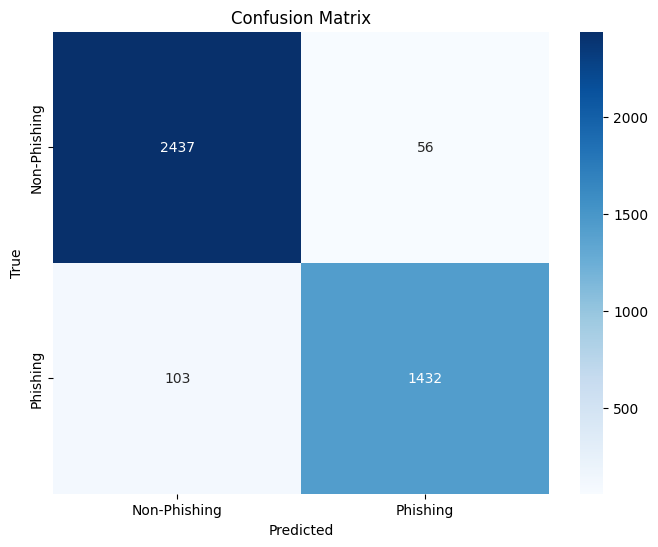

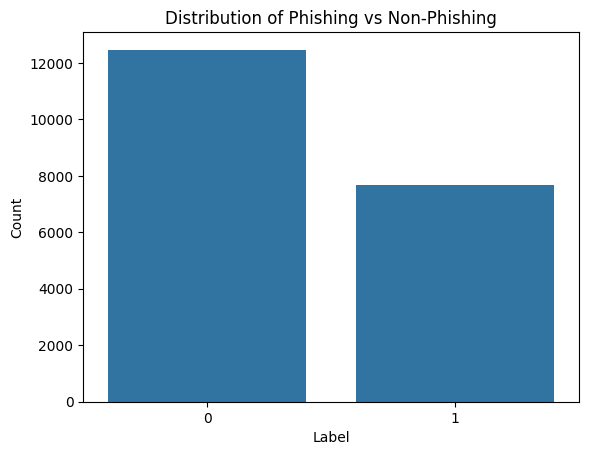

['tfidf_classifier.pkl']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Create Seaborn heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Phishing", "Phishing"], yticklabels=["Non-Phishing", "Phishing"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create a distribution plot of the labels (Phishing vs Non-Phishing)
sns.countplot(x='label', data=df)
plt.title("Distribution of Phishing vs Non-Phishing")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Save the vectorizer and the model for future use
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(classifier, "tfidf_classifier.pkl")

**ROC Curve (Receiver Operating Characteristic Curve):**

 shows how well a model distinguishes between positive and negative classes at different thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

AUC (Area Under the Curve) measures the overall performance of the model. It ranges from 0 to 1:

AUC = 0.5: The model is no better than random guessing.

AUC = 1: The model perfectly classifies all instances.

A higher AUC indicates a better performing model.

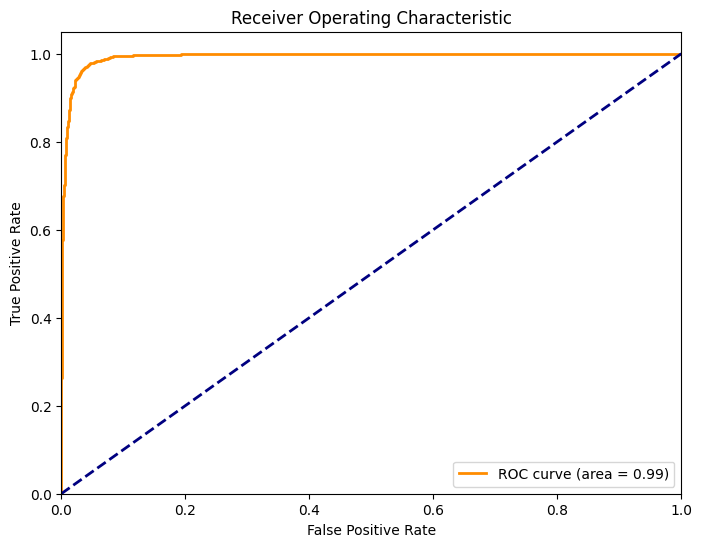

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**BERT Embeddings**

 BERT transforms text into embeddings by considering the context of each word in a sentence. It processes the text through a pre-trained model, capturing deep semantic meaning, which helps improve the accuracy of phishing detection.

In [ ]:
from nltk.tokenize import RegexpTokenizer
import re
import pandas as pd
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Move model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# def custom_tokenizer(text):
#     # Normalize case
#     text = text.lower()

#     # Replace URLs and emails
#     text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)
#     text = re.sub(r'\S+@\S+\.\S+', '<EMAIL>', text)

#     # Use RegexpTokenizer to handle special patterns
#     tokenizer = RegexpTokenizer(r'\w+|<URL>|<EMAIL>|[^\w\s]')
#     tokens = tokenizer.tokenize(text)

#     return tokens

def text_to_embedding(text):
    # Tokenize and create input IDs
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Move inputs to GPU
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        # Get embeddings from BERT
        outputs = model(**inputs)
        # Mean pooling to create a single sentence embedding
        sentence_embedding = outputs.last_hidden_state.mean(dim=1)
    return sentence_embedding.squeeze().cpu().numpy()  # Move result back to CPU

# Load the phishing dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)

# Prepare a list for embedded data
embedded_data = []
for i in range(len(dataset['train'])):
    text = dataset['train'][i]['text']
    numeric = text_to_embedding(text)
    # Append the data as a dictionary
    embedded_data.append({"embeddeded_data": numeric, "label": dataset['train'][i]['label']})

# Convert to DataFrame
df = pd.DataFrame(embedded_data)
print(df.head())

# Save the DataFrame to a CSV file
csv_file_path = "tokenized_data.csv"
df.to_csv(csv_file_path, index=False)

# Verify the results
print("Data saved to", csv_file_path)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

phishing-dataset.py:   0%|          | 0.00/3.27k [00:00<?, ?B/s]

texts.json:   0%|          | 0.00/52.1M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

                                     embeddeded_data  label
0  [-0.23840225, 0.29437107, 0.15873352, -0.30811...      0
1  [0.020063879, 0.19346473, 0.032713287, -0.2022...      0
2  [-0.12743124, -0.14868295, 0.41058612, 0.09094...      0
3  [0.2967644, 0.29070988, 0.84305334, -0.1575460...      1
4  [-0.17464297, -0.10808944, 0.610938, -0.187545...      1
Data saved to tokenized_data.csv


In [ ]:
import torch
import numpy as np
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Text to embedding function
def text_to_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        sentence_embedding = outputs.last_hidden_state.mean(dim=1)
    return sentence_embedding.cpu().numpy()

# Load the dataset
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)

# Prepare embedded data
embedded_data = []
for i in range(len(dataset['train'])):
    text = dataset['train'][i]['text']
    numeric = text_to_embedding(text)  # Get embedding as NumPy array
    embedded_data.append(numeric.squeeze()) # Append to the list, squeezing redundant dimension if it exists

# Convert to PyTorch tensor directly
X = torch.tensor(np.array(embedded_data), dtype=torch.float32)
y = torch.tensor(dataset['train']['label'], dtype=torch.long)  # Labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proceed with your model training
# ...

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
logreg = LogisticRegression(max_iter=1000)
print(X_train[1])
print(X_test[1])
# Train the model
# logreg.fit(X_train, y_train)

# # Make predictions
# y_pred = logreg.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred, target_names=["Legitimate", "Phishing"]))


tensor([-3.9960e-02, -5.1718e-01,  9.2422e-02, -4.0368e-01,  4.9880e-01,
        -4.0248e-01, -1.8766e-02,  8.5355e-01,  5.0835e-02, -3.4468e-01,
         1.3964e-01, -5.3211e-01, -2.8538e-02,  3.8109e-01, -1.5205e-01,
        -6.1454e-02,  4.6030e-01,  1.7244e-01,  1.3398e-01,  3.7134e-01,
         4.7642e-01, -3.4933e-02,  2.6481e-02,  3.4761e-01,  1.1297e-01,
         3.6298e-03,  1.5910e-02,  1.0546e-01,  1.8051e-01, -1.1308e-02,
         1.4159e-02,  2.1774e-02, -5.0295e-01,  8.7379e-02, -1.2226e-01,
        -1.1940e-01, -2.5721e-01,  4.6467e-01, -3.1364e-01,  1.8566e-01,
        -4.0216e-01, -3.8650e-01,  2.7555e-01,  1.5056e-01, -3.9401e-01,
        -5.0744e-01,  1.1343e-01, -1.9556e-01,  1.1245e-01, -9.2394e-02,
         2.4548e-01,  3.8560e-01, -2.7930e-01,  2.9354e-01, -2.1495e-01,
         4.0819e-01, -6.8967e-02, -3.7884e-01, -3.2287e-01,  2.2309e-01,
         1.8686e-01, -1.4651e-01,  3.6724e-01, -6.2527e-01,  3.8705e-01,
         4.1213e-01, -4.9238e-02,  6.4752e-04, -4.7

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define a simple classifier
class SimpleClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Instantiate the model
input_dim = X_train.shape[1]  # Number of features
num_classes = len(torch.unique(y))  # Number of unique labels
classifier = SimpleClassifier(input_dim, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Training loop
num_epochs = 10
batch_size = 32

for epoch in range(num_epochs):
    classifier.train()
    permutation = torch.randperm(X_train.size(0))
    total_loss = 0

    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train[indices].to(device), y_train[indices].to(device)

        optimizer.zero_grad()
        outputs = classifier(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}")

# Evaluate the model
classifier.eval()
with torch.no_grad():
    y_pred = []
    for i in range(0, X_test.size(0), batch_size):
        batch_x = X_test[i:i + batch_size].to(device)
        outputs = classifier(batch_x)
        y_pred.extend(torch.argmax(outputs, dim=1).cpu().numpy())

# Calculate accuracy
y_pred = torch.tensor(y_pred)
accuracy = (y_pred == y_test).sum().item() / y_test.size(0) * 100
print(f"Accuracy: {accuracy:.2f}%")


Epoch 1/10, Loss: 137.7618
Epoch 2/10, Loss: 86.3306
Epoch 3/10, Loss: 77.0461
Epoch 4/10, Loss: 72.3649
Epoch 5/10, Loss: 68.6768
Epoch 6/10, Loss: 65.3210
Epoch 7/10, Loss: 62.7024
Epoch 8/10, Loss: 61.2063
Epoch 9/10, Loss: 59.1786
Epoch 10/10, Loss: 58.1379
Accuracy: 96.15%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [10]:
!git clone https://github.com/itaim18/Phishing-detection-BERT-baseline-regression-transformers-and-more.git


Cloning into 'Phishing-detection-BERT-baseline-regression-transformers-and-more'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [12]:
%cd Phishing-detection-BERT-baseline-regression-transformers-and-more


/content/drive/MyDrive/Colab Notebooks/Phishing-detection-BERT-baseline-regression-transformers-and-more


In [13]:
!git init


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [27]:
# Mount Google Drive (if working in Drive)
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the ipynb directory
%cd /content/drive/MyDrive/Colab Notebooks



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [29]:
!git remote add origin https://github.com/itaim18/Phishing-detection-BERT-baseline-regression-transformers-and-more.git


In [30]:
!git remote -v


origin	https://github.com/itaim18/Phishing-detection-BERT-baseline-regression-transformers-and-more.git (fetch)
origin	https://github.com/itaim18/Phishing-detection-BERT-baseline-regression-transformers-and-more.git (push)


In [31]:
!git add phishing_check_visu.ipynb


In [32]:
!git commit -m "Save progress from Colab"


[master 9f4cee8] Save progress from Colab
 1 file changed, 1 insertion(+), 1 deletion(-)


In [33]:
!git branch


* master


In [34]:
!git push origin master


fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git commit --amend --all

hint: Waiting for your editor to close the file... 7[>4;2m="/content/drive/MyDrive/Colab Notebooks/.git/COMMIT_EDITMSG" 11L, 296B▽  Pzz\[0%m           [>c]10;?]11;?Save progress from Colab# Please enter the commit message for your changes. Lines starting# with '#' will be ignored, and an empty message aborts the commit.
#
# Date:      Wed Dec 4 15:37:23 2024 +0000
#
# On branch master
# Changes to be committed:
#       modified:   phishing_check_visu.ipynb
#
~                                                                                                   ~                                                                                                   ~                                                                                                   ~                                                                                                   ~                                                                                                   ~                         

In [ ]:
!git push origin master


In [28]:

# Check if Git is initialized and pull the latest changes
!git status
!git pull origin main  # or 'master' if that's your default branch

# After making changes, stage, commit, and push back to GitHub
!git add .
!git commit -m "Save progress from Colab"
!git push origin main  # or 'master' if that's your default branch


On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   phishing_check_visu.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
[master 322f22d] Save progress from Colab
 1 file changed, 1 insertion(+), 1 deletion(-)
error: src refspec main does not match any
error: failed to push some refs to 'origin'


In [15]:
!git config --global user.name "itaim18"
!git config --global user.email "itaim148@gmail.com"
